# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# let matplotlib run inline for VSCode
# Skip this cell if you're using Jupyter Lab/Notebook
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [140]:
# I like my charts to be dark theme, don't like the bar color the default 'dark_background' theme offers
# Skip this cell if you want to keep everything light
plt.rcParams['axes.facecolor'] = 'xkcd:dark gray'
plt.rcParams['figure.facecolor'] = 'xkcd:dark gray'
plt.rcParams['xtick.color'] = 'xkcd:light gray'
plt.rcParams['xtick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['ytick.color'] = 'xkcd:light gray'
plt.rcParams['ytick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['axes.edgecolor'] = 'xkcd:gray'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'xkcd:light gray'
plt.rcParams['text.color'] = 'xkcd:light gray'


In [92]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duped_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

all_data_dupe_id = pd.DataFrame(combined_df.loc[combined_df['Mouse ID'].isin(duped_ids),:])


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# I don't know why the indices are different than the sample output, but the data appears to be perfectly valid.
all_data_dupe_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = pd.DataFrame(combined_df.loc[combined_df['Mouse ID'].isin(duped_ids) == False,:])

In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics
***

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

groupby_drug_df = cleaned_df.groupby(['Drug Regimen'])

summary_df = pd.DataFrame({
    "Mean Tumor Volume": groupby_drug_df['Tumor Volume (mm3)'].mean(),
    "Median Tumor Volume": groupby_drug_df['Tumor Volume (mm3)'].median(),
    "Tumor Size Variance": groupby_drug_df['Tumor Volume (mm3)'].var(),
    "Tumor Volume Std. Dev": groupby_drug_df['Tumor Volume (mm3)'].std(),
    "Tumor Volume Std. Err": groupby_drug_df['Tumor Volume (mm3)'].sem()
})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Size Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)



# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = groupby_drug_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts
***

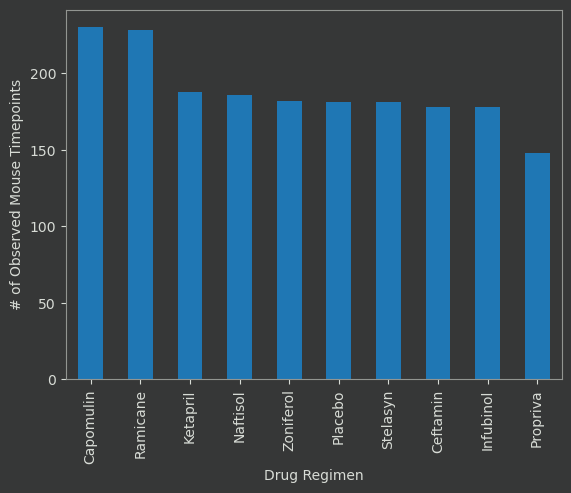

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_values = pd.Series(groupby_drug_df['Timepoint'].count()).set_axis(groupby_drug_df.indices).sort_values(ascending=False)

bar_values.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

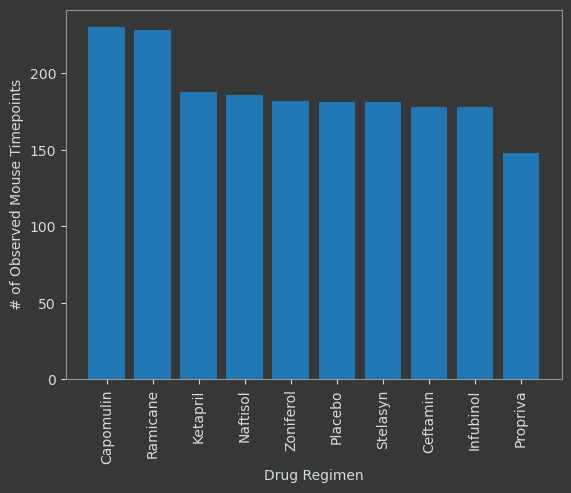

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_values.index, bar_values.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

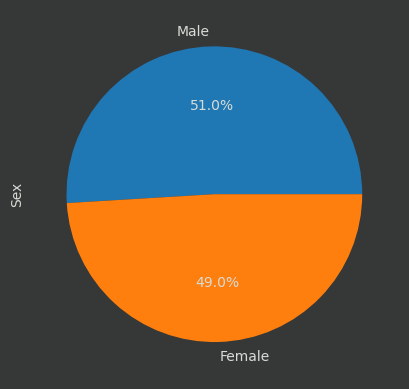

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_values = pd.Series(cleaned_df['Sex'].value_counts())

pie_values.plot(kind='pie', autopct="%1.1f%%")
plt.ylabel(pie_values.index.name)

plt.show()

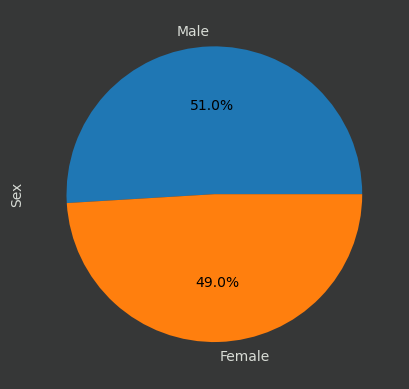

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# technique for autotext-only formatting received from stackoverflow by Andrey Sobolev (2015)
# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
# this does not seem to be an option using the pandas plotting method, more research is required.
# (done for readability when viewed with dark stylings applied)
_, _, autotexts = plt.pie(pie_values.values, labels=pie_values.index, autopct="%1.1f%%")
for autotext in autotexts:
    autotext.set_color('black')

plt.ylabel(pie_values.index.name)

plt.show()

## Quartiles, Outliers and Boxplots
***

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_ages = cleaned_df.groupby(['Mouse ID'])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df = pd.merge(max_ages, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner').reset_index(drop=True)
max_time_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outl_thresh = 1.5
for tr in range(len(treatments)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tr_values = cleaned_df.loc[cleaned_df['Drug Regimen']==treatments[tr],:]['Tumor Volume (mm3)'].reset_index(drop=True)
    # add subset
    final_tumor_volumes.append(tr_values.values)   
    
    # Determine outliers using upper and lower bounds
    q1 = tr_values.quantile(0.25)
    q3 = tr_values.quantile(0.75)
    iqr = q3 - q1
    outliers = pd.concat([tr_values[tr_values < (q1 - iqr * outl_thresh)].dropna(), tr_values[tr_values > (q3 + iqr * outl_thresh)].dropna()])


    # print results to console
    print(treatments[tr], "Potential Outliers: \n" + (str(outliers) if len(outliers) > 0 else 'None found') + '\n')

Capomulin Potential Outliers: 
8    25.472143
9    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane Potential Outliers: 
9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol Potential Outliers: 
None found

Ceftamin Potential Outliers: 
None found



## Default Theme Box Plot

In [ ]:
# RUN THIS CELL IF YOU ARE USING A LIGHT THEME
# (SKIP OTHERWISE)

fig, ax1 = plt.subplots()
bp = ax1.boxplot(final_tumor_volumes, labels=treatments)
plt.setp(bp['fliers'], color='red', markerfacecolor='red', marker='o', markersize=10)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Dark Theme Box Plot

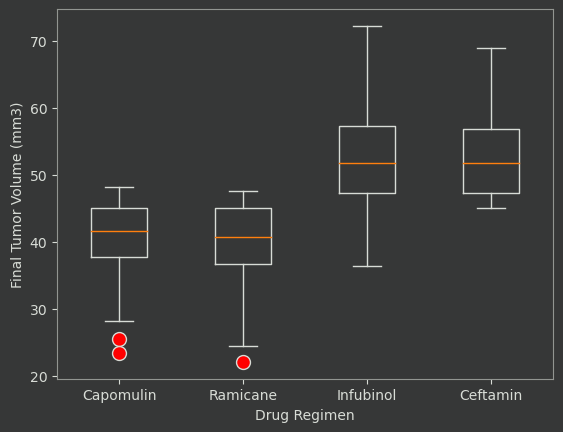

In [150]:
# AND THIS ONE IF YOU ARE USING THE DARK THEME
# (SKIP OTHERWISE)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax1 = plt.subplots()
bp = ax1.boxplot(final_tumor_volumes, labels=treatments)
plt.setp(bp['boxes'], color='xkcd:light gray')
plt.setp(bp['whiskers'], color='xkcd:light gray')
plt.setp(bp['caps'], color='xkcd:light gray')
plt.setp(bp['fliers'], markeredgecolor='xkcd:light gray', markerfacecolor='red', marker='o', markersize=10)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots
***

In [152]:
# Create DF filtered by specified drug

drug = "Capomulin"
drug_specific_df = combined_df.loc[combined_df['Drug Regimen'] == drug,['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

In [175]:
# randomly select a single mouse and grab all relevant data
# (this was not necessary at all but I thought it would be fun)

random_mouse = drug_specific_df.sample(1)['Mouse ID'].values[0]

# uncomment this line for the mouse that matches the current plot below
# random_mouse = 'y793'

rand_mouse_df = drug_specific_df.loc[drug_specific_df['Mouse ID'] == random_mouse, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
rand_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
115,y793,0,45.000000
116,y793,5,41.019913
117,y793,10,41.630010
118,y793,15,42.283665
119,y793,20,40.716428
120,y793,25,38.992734
121,y793,30,35.726023
122,y793,35,36.327870
123,y793,40,31.475411
124,y793,45,31.896238


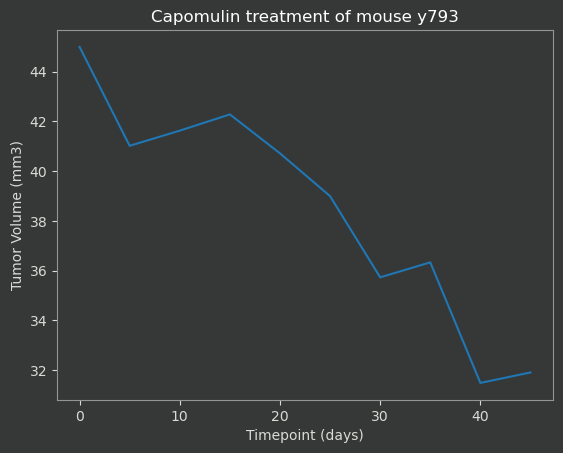

In [176]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plot_data = [rand_mouse_df['Timepoint'].values, rand_mouse_df['Tumor Volume (mm3)'].values, rand_mouse_df['Mouse ID'].unique()[0]]

plt.plot(plot_data[0], plot_data[1])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"{drug} treatment of mouse {plot_data[2]}")

plt.show()

In [166]:
# creating subset data for scatter plot
drug_specific_by_mouse_df = drug_specific_df.groupby('Mouse ID')

avg_volumes = drug_specific_by_mouse_df['Tumor Volume (mm3)'].mean()
weights = drug_specific_by_mouse_df['Weight (g)'].mean()


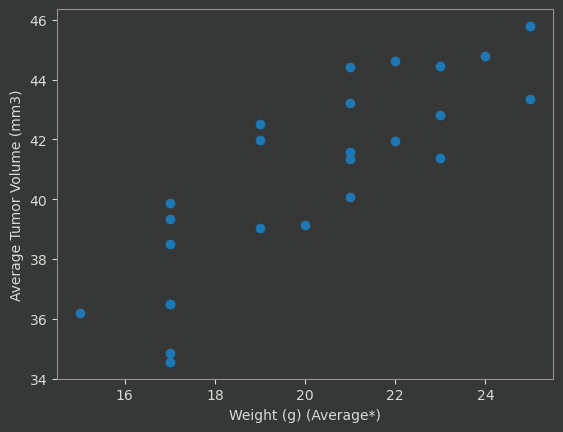

*Average weight of mouse did not change during trial


In [186]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

scatter_data = [weights.values, avg_volumes.values]
plt.scatter(scatter_data[0], scatter_data[1])
plt.xlabel('Weight (g) (Average*)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
print('*Average weight of mouse did not change during trial')

# NOTE: Curiously, this graph seems to match the starter code output

## Correlation and Regression
***

Correlation (r-value) between mouse weight and average tumor volume: 0.84


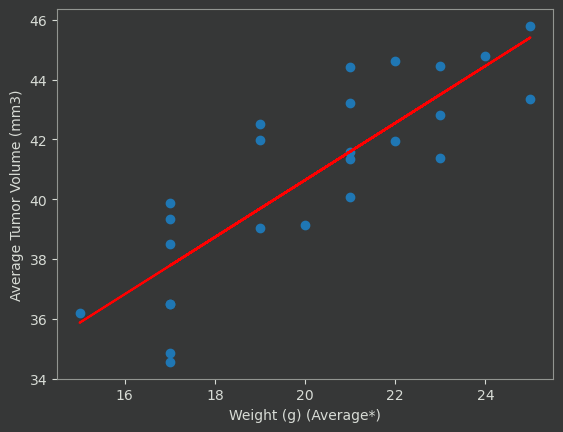

*Average weight of mouse did not change during trial


In [187]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rval, pval, stderr) = st.linregress(scatter_data[0], scatter_data[1])
# y=mx+b
regress_values = scatter_data[0] * slope + intercept
print('Correlation (r-value) between mouse weight and average tumor volume:', "{:.2f}".format(rval))

plt.scatter(scatter_data[0], scatter_data[1])
plt.plot(scatter_data[0], regress_values, 'r-')
plt.xlabel('Weight (g) (Average*)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()
print('*Average weight of mouse did not change during trial')

# Starter File Outputs (for Reference)
***

In [ ]:
# Pie chart output skipped, data was easily verifiable

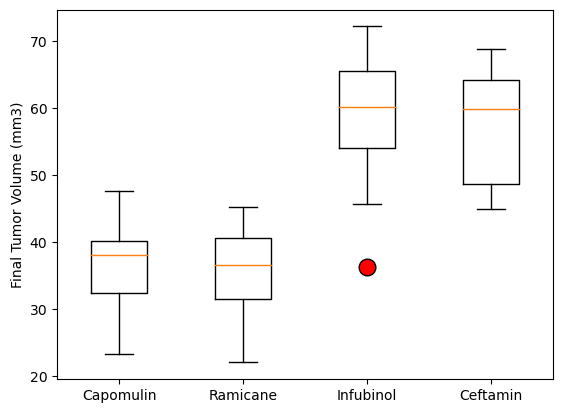

In [15]:
# Starter file desired output, preserved for reference
# does not appear to match original data, but could simply be another set

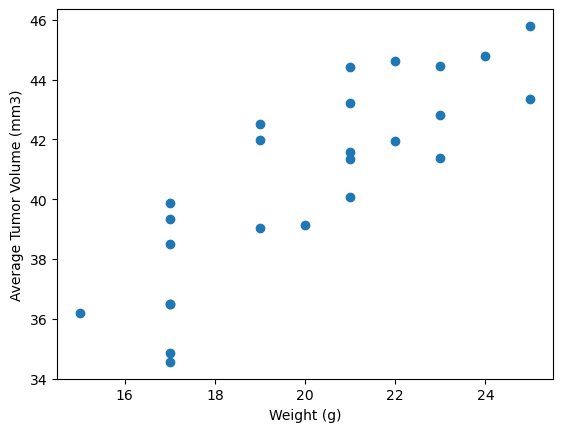

In [17]:
# Starter file desired output, preserved for reference

The correlation between mouse weight and the average tumor volume is 0.84


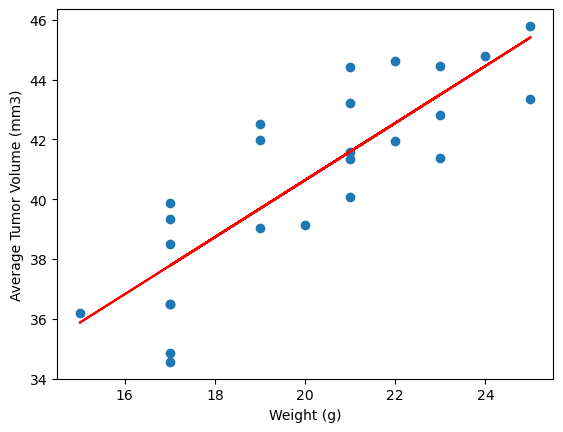

In [18]:
# Starter file desired output, preserved for reference